In [1]:
import pandas as pd
import ta
from ta.trend import SMAIndicator, EMAIndicator, MACD, ADXIndicator
from ta.momentum import RSIIndicator, StochRSIIndicator, WilliamsRIndicator
from ta.volatility import BollingerBands, AverageTrueRange
from ta.volume import OnBalanceVolumeIndicator, ChaikinMoneyFlowIndicator
from ta.others import CumulativeReturnIndicator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ticker = "AAPL"
file_path = f"stocks/{ticker}.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['returns'] = df['Close'].pct_change()
df['5_day_return'] = df['Close'].pct_change(periods=4)

In [5]:
df = df.drop(['Open', 'Adj Close'], axis=1)

In [27]:
df.head()

,Date,High,Low,Close,Volume,returns,5_day_return,SMA,EMA,MACD_PCT,...,STOCH_RSI,WILLIAMS_R,Bollinger_Middle_PCT,Bollinger_Upper_PCT,Bollinger_Lower_PCT,ATR_PCT,OBV,CMF,CUMULATIVE_RETURN_PCT,SMA_pct
0,2014-10-17,24.750000,24.202499,24.417500,272718800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,272718800,NaN,0.000000,NaN
1,2014-10-20,24.990000,24.555000,24.940001,310069200,0.021399,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,582788000,NaN,2.139863,NaN
2,2014-10-21,25.754999,25.317499,25.617500,378495600,0.027165,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,961283600,NaN,4.914511,NaN
3,2014-10-22,26.027500,25.650000,25.747499,273052400,0.005075,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1234336000,NaN,5.446913,NaN
4,2014-10-23,26.262501,25.907499,26.207500,284298800,0.017866,0.073308,0.968654,0.974496,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1518634800,NaN,7.330812,NaN


In [7]:
# Simple Moving Average (SMA)
sma_indicator = ta.trend.SMAIndicator(df['Close'], 5, fillna=False)
df['SMA'] = sma_indicator.sma_indicator() / df['Close']

In [8]:
# Exponential Moving Average (EMA)
ema_indicator = EMAIndicator(df['Close'], 5, fillna=False)
df['EMA'] = ema_indicator.ema_indicator() / df['Close']

In [9]:
# Moving Average Convergence Divergence
macd_indicator = MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=False)
df['MACD_PCT'] = macd_indicator.macd() / df['Close']
df['MACD_SIGNAL_PCT'] = macd_indicator.macd_signal() / df['Close']

In [10]:
# Average Directional Index (ADX)
adx_indicator = ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14, fillna=False)
df['ADX'] = adx_indicator.adx()  # Already a strength indicator (0-100), no division by 'Close'

In [11]:
# Relative Strength Index (RSI)
rsi_indicator = RSIIndicator(close=df['Close'], window=14, fillna=False)
df['RSI'] = rsi_indicator.rsi()  # Already a percentage (0-100)

In [12]:
# Stochastic RSI
stoch_rsi_indicator = StochRSIIndicator(close=df['Close'], window=14, smooth1=3, smooth2=3, fillna=False)
df['STOCH_RSI'] = stoch_rsi_indicator.stochrsi()  # Already a percentage (0-1)

In [13]:
# Williams %R
williams_r = WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp=14, fillna=False)
df['WILLIAMS_R'] = williams_r.williams_r()  # Already a percentage (-100 to 0)

In [14]:
# Bollinger Bands (Middle Band as percentage)
bb_indicator = BollingerBands(close=df['Close'], window=20, window_dev=2, fillna=False)
df['Bollinger_Middle_PCT'] = bb_indicator.bollinger_mavg() / df['Close']
df['Bollinger_Upper_PCT'] = bb_indicator.bollinger_hband() / df['Close']
df['Bollinger_Lower_PCT'] = bb_indicator.bollinger_lband() / df['Close']

In [15]:
# Average True Range (ATR)
atr_indicator = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14, fillna=False)
df['ATR_PCT'] = atr_indicator.average_true_range() / df['Close']

In [16]:
# On-Balance Volume (OBV)
obv_indicator = OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume'], fillna=False)
df['OBV'] = obv_indicator.on_balance_volume()  # Not a price percentage

In [17]:
# Chaikin Money Flow (CMF)
cmf_indicator = ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=20, fillna=False)
df['CMF'] = cmf_indicator.chaikin_money_flow()  # Already a ratio (-1 to 1)

In [18]:
# Cumulative Returns
cumulative_return = CumulativeReturnIndicator(close=df['Close'], fillna=False)
df['CUMULATIVE_RETURN_PCT'] = cumulative_return.cumulative_return()  # Already a percentage

In [19]:
sma_corr = df['SMA'].corr(df['5_day_return'])
print(sma_corr)

# for AAPL stock:
# corr without dividing term: 0.0019516297813574363
# corr with dividing term: -0.9022751564882464

-0.9022751564882464


In [20]:
sma_corr2 = sma_corr = (df['SMA'] / df['Close']).corr(df['5_day_return'])
print(sma_corr)

-0.06925643285284586


In [21]:
df['SMA_pct'] = df['SMA'].pct_change()

In [22]:
sma_corr = df['SMA_pct'].corr(df['returns'])
print(sma_corr)

-0.9104432058808648


In [23]:
correlation_matrix = df.corr()

In [24]:
print(correlation_matrix)

                           Date      High       Low     Close    Volume  \
Date                   1.000000  0.944240  0.943921  0.944104 -0.566936   
High                   0.944240  1.000000  0.999809  0.999855 -0.518213   
Low                    0.943921  0.999809  1.000000  0.999854 -0.525255   
Close                  0.944104  0.999855  0.999854  1.000000 -0.522021   
Volume                -0.566936 -0.518213 -0.525255 -0.522021  1.000000   
returns                0.005414  0.003916  0.005146  0.013242 -0.058071   
5_day_return           0.013338  0.021811  0.024697  0.027229 -0.115245   
SMA                   -0.010426 -0.017561 -0.020759 -0.025208  0.139043   
EMA                   -0.011830 -0.021711 -0.025274 -0.029728  0.156875   
MACD_PCT               0.042341  0.084005  0.087707  0.085986 -0.212376   
MACD_SIGNAL_PCT        0.048966  0.092809  0.095626  0.093890 -0.188564   
ADX                   -0.007563 -0.022641 -0.022442 -0.022529  0.086958   
RSI                   -0.

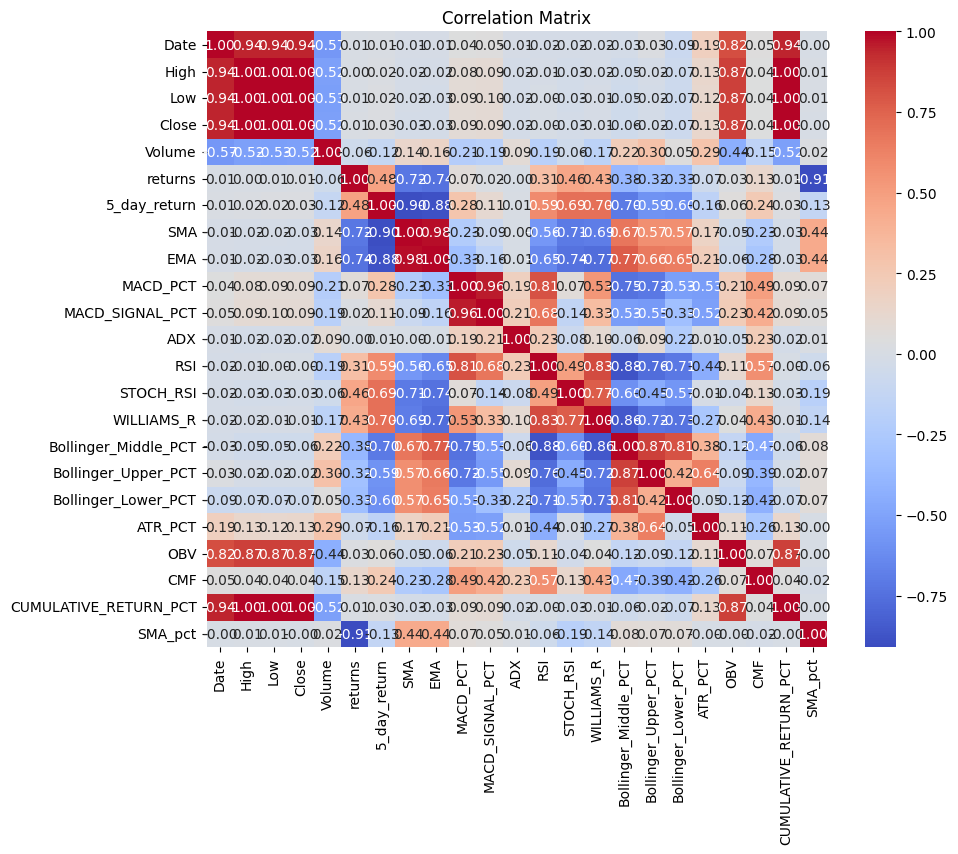

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [29]:
technical_indicators = [
    'SMA', 'EMA', 'RSI', 'STOCH_RSI', 'MACD_PCT',
    'Bollinger_Middle_PCT', 'ATR_PCT', 'CMF', 'ADX']

target_columns = ['5_day_return', 'returns']

columns_of_interest = technical_indicators + target_columns

filtered_df = df[columns_of_interest]

correlation_matrix = filtered_df.corr()

correlations_with_targets = correlation_matrix[target_columns]

print(correlations_with_targets)

                      5_day_return   returns
SMA                      -0.902275 -0.722231
EMA                      -0.881606 -0.742552
RSI                       0.589526  0.314389
STOCH_RSI                 0.694639  0.462413
MACD_PCT                  0.280926  0.071026
Bollinger_Middle_PCT     -0.702112 -0.383148
ATR_PCT                  -0.163340 -0.066773
CMF                       0.243313  0.127711
ADX                       0.007270 -0.004941
5_day_return              1.000000  0.478438
returns                   0.478438  1.000000
